In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.


In [2]:
df=pd.read_csv('fcc-forum-pageviews.csv')

In [3]:
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [4]:
df=df.set_index('date')
df.index=pd.to_datetime(df.index)

In [5]:
df1=df[(df['value']>df['value'].quantile(0.025))&(df['value']<df['value'].quantile(0.975))]

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3 KB


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

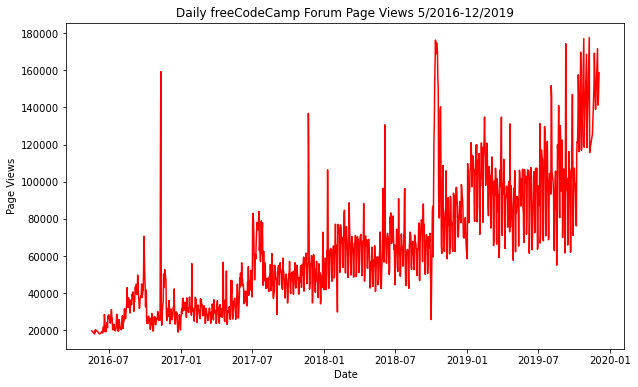

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df1.index,df1['value'],'red')
plt.xlabel("Date")  
plt.ylabel("Page Views")  
plt.ticklabel_format(style='plain', axis='y')



plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")  # add title


In [8]:
# plt.figure(figsize=(10, 6))
# plt.bar(g(2010),df['value'])


# plt.xlabel("Date")  
# plt.ylabel("AveragePage Views")  
# plt.ticklabel_format(style='plain', axis='y')
# plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")


Create a draw_bar_plot function that draws a bar chart to show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

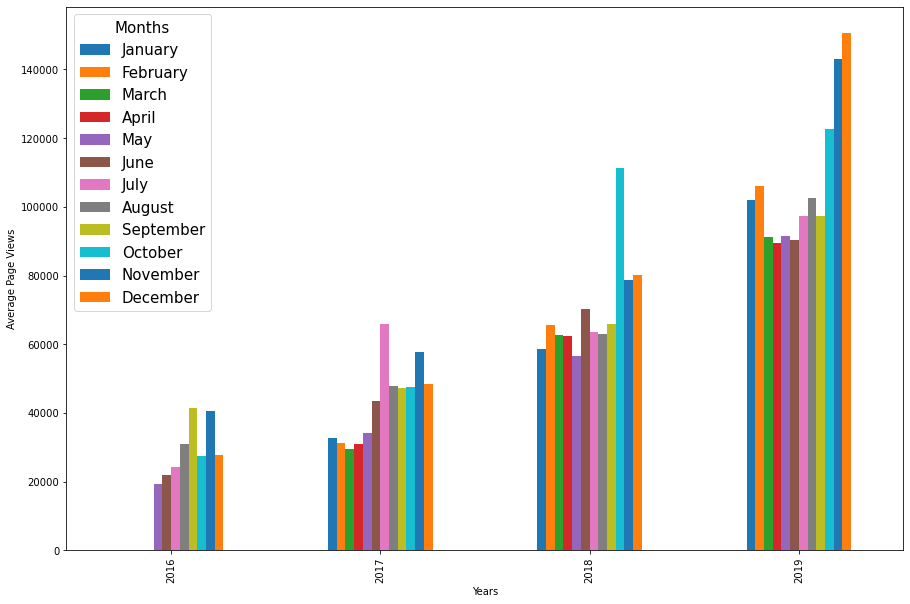

In [9]:
df_bar = df1.copy()
df_bar['Year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['Month'] = pd.DatetimeIndex(df_bar.index).month

df_bar = df_bar.groupby(['Year', 'Month'])['value'].mean()
df_bar = df_bar.unstack()
month_names=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
             'August', 'September', 'October', 'November', 'December']
# Draw bar plot
fig = df_bar.plot(kind= 'bar', figsize = (15,10)).figure

plt.title('')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
lg = plt.legend(title= 'Months', fontsize = 15, labels = month_names)
title = lg.get_title()
title.set_fontsize(15)

In [10]:
df_bar

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality).

Text(0, 0.5, 'Page Views')

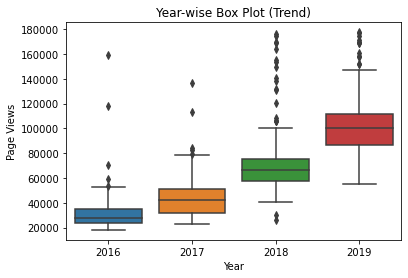

In [11]:
df_box = df1.copy()
df_box.reset_index(inplace=True)
df_box['Year'] = pd.DatetimeIndex(df_box["date"]).year
df_box['Month'] = pd.DatetimeIndex(df_box["date"]).month
plt1 =sns.boxplot(x = "Year", y = "value", data = df_box)
plt1.set_title("Year-wise Box Plot (Trend)")
plt1.set_xlabel('Year')
plt1.set_ylabel('Page Views')

Text(0, 0.5, 'Page Views')

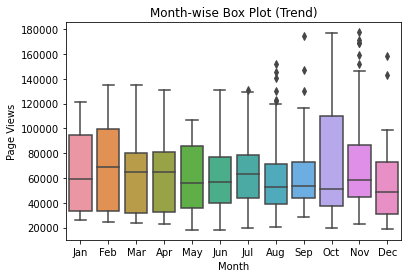

In [12]:
plt2=sns.boxplot(x='Month',y='value',data=df_box)
a=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt2.set_xticklabels(a)
plt2.set_title("Month-wise Box Plot (Trend)")
plt2.set_xlabel('Month')
plt2.set_ylabel('Page Views')